# Import Packages

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.dates as mdates

# Load Dataset

In [70]:
data=pd.read_csv("data_traffic_congestion_2020.csv")

Making a copy of the Dataset

In [71]:
logistics = data.copy()

# Data 

Date: Date of Transport <br>Day: Day of Transport <br>Destination_Location: Final destination of Transport <br> Fastest_Route_Distance: Shortest Distance to location <br> Fastest_Route_Name: Name of the route for transportation <br> Fastest_Route_Time: Time taken through the fastest route for transportation <br> Holiday: If the particular day is a holiday <br> Special_Condition: if there are any special conditions involved in travel <br> Starting_Location: Starting point of the transportation <br> Sys_Time: Current time in the system when the data point was collected <br> Weather: The weather condition during the day of transportation <br> Data_prediction: The prediction for the traffic on the route

# Tail and head

Looking at the Tail and the Head of the Data, we see that this dataset involves details of transportation, like the destiination of travel, day, date, time, weather and a prediction of the traffic situtation either being : <br>1. smooth <br> 2. highly congested <br> 3. slightly congested <br> 4. congested <br> 5. blockage <br>

In [72]:
logistics.head()

,Date,Day,Destination_Location,Fastest_Route_Distance,Fastest_Route_Name,Fastest_Route_Time,Holiday,Special_Condition,Starting_Location,Sys_Time,Weather,Data_prediction
0,13/02/2020,Thursday,9th_avenue,1000,Jinnah Avenue,60,no,no,capital_gymkhana,0:00:01,Showers,smooth
1,13/02/2020,Thursday,centaurus,1300,Jinnah Avenue,120,no,no,9th_avenue,0:00:09,Showers,highly congested
2,13/02/2020,Thursday,crown_plaza,1000,Jinnah Avenue and Faisal Avenue Flyover,60,no,no,centaurus,0:00:17,Showers,smooth
3,13/02/2020,Thursday,roshan_plaza,2700,Jinnah Ave,180,no,no,crown_plaza,0:00:24,Showers,smooth
4,13/02/2020,Thursday,salt_and_pepper,3900,Jinnah Ave,300,no,no,roshan_plaza,0:00:31,Showers,slightly congested


In [73]:
logistics.tail()

,Date,Day,Destination_Location,Fastest_Route_Distance,Fastest_Route_Name,Fastest_Route_Time,Holiday,Special_Condition,Starting_Location,Sys_Time,Weather,Data_prediction
317107,29/02/2020,Saturday,IJP road,4400,Murree Rd and I.J.P. Road,540,no,no,mehran hotel,23:57:23,Mostly Cloudy,slightly congested
317108,29/02/2020,Saturday,Jamia Masjid Bilal,1000,I.J.P. Road,180,no,no,IJP road,23:57:36,Mostly Cloudy,congested
317109,29/02/2020,Saturday,eventox_event_management,1000,Sufi Tabasum Rd and Service Rd W,120,no,no,STroad_start_stop,23:57:46,Mostly Cloudy,highly congested
317110,29/02/2020,Saturday,Al_hateem_palace,1100,Service Rd South I 8,120,no,no,IJP_metro,23:58:18,Mostly Cloudy,highly congested
317111,29/02/2020,Saturday,last_stop,1400,I.J.P. Road,180,no,no,Al_hateem_palace,23:58:25,Mostly Cloudy,smooth


# Looking at the shape

We notice that the dataset has 317112 rows(Data points) with 12 columns being the features

In [74]:
logistics.shape

(317112, 12)

## Check the data types of the columns for the dataset

In [75]:
logistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317112 entries, 0 to 317111
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Date                    317112 non-null  object
 1   Day                     317112 non-null  object
 2   Destination_Location    317112 non-null  object
 3   Fastest_Route_Distance  317112 non-null  int64 
 4   Fastest_Route_Name      317112 non-null  object
 5   Fastest_Route_Time      317112 non-null  int64 
 6   Holiday                 317112 non-null  object
 7   Special_Condition       317112 non-null  object
 8   Starting_Location       317112 non-null  object
 9   Sys_Time                317112 non-null  object
 10  Weather                 317112 non-null  object
 11  Data_prediction         317112 non-null  object
dtypes: int64(2), object(10)
memory usage: 29.0+ MB


# Checking Unique values

In [76]:
print(logistics['Destination_Location'].unique())

['9th_avenue' 'centaurus' 'crown_plaza' 'roshan_plaza' 'salt_and_pepper'
 'bar_bq_tonight' 'D_chowk' 'childrens_park'
 'pak_turk_maarif_international_school' 'jamia_masjid' 'missile_chowk'
 'capital_gymkhana' '7th_ave' 'zaman_khan_khokha' 'gerry_centre'
 'itehad_steel' 'islamabad_model_college_for_boys' 'mardan_nursery'
 'css_officers_academy' 'jamia_masjid_sher_e_rabani' 'air_university'
 'tipu_chowk' 'talnol_ittehad_plaza' 'extreme_engineering_solutions'
 'italian_pizza' 'horizon_it_networks' 'geo_news_islamabad_office'
 'hunzapalace' 'alliedschool_g10' 'hawks_cricket_ground'
 'g9_community_center' 'jinnah_football_club_ground' 'kharaian_pull'
 'pindora chungi' 'mehran hotel' 'IJP road' 'Jamia Masjid Bilal'
 'eventox_event_management' 'Al_hateem_palace' 'last_stop'
 'castpro_engineering' 'awan_shop' 'dyna_trading_company'
 'pirwadhai_masjid' 'papaya_faroosh' 'wazeer_general_store']


In [77]:
print(logistics['Day'].unique())

['Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']


In [78]:
print(logistics['Fastest_Route_Distance'].unique())

[ 1000  1300  2700  3900  1600  2100  1400  1200  1100  1900  2500  3000
  2300  4700  3700  7900   950  3300  3500  1700  2800  4100  3200  7300
  3400   900  4400  5200  6400 10200  5300  5500  8600 10500  8300]


In [79]:
print(logistics['Fastest_Route_Name'].unique())

['Jinnah Avenue' 'Jinnah Avenue and Faisal Avenue Flyover' 'Jinnah Ave'
 'A.K. Fazl-ul-Haq Rd and Jinnah Ave' 'Nazim-ud-din Rd'
 'Nazim-ud-din Rd and Jinnah Ave' 'Jinnah Ave and Constitution Ave'
 'A.K. Fazl-ul-Haq Rd' 'Constitution Ave' '9th Ave'
 'Parbat Rd and 7th Ave' '7th Ave' 'Service Rd W and 9th Ave'
 'Sufi Tabasum Rd' 'Service Rd E' 'Service Rd W'
 'Ibn-e-Sina Rd and 9th Ave' 'Ibn-e-Sina Rd' 'I.J.P. Road'
 'Murree Rd and I.J.P. Road' 'Sufi Tabasum Rd and Service Rd W'
 'Service Rd South I 8' 'I.J.P. Rd and I.J.P. Road'
 'Service Rd I 11 (South) and I.J.P. Road'
 'Faisal Ave/Islamabad Expressway']


In [80]:
print(logistics['Fastest_Route_Time'].unique())

[  60  120  180  300  240  360  420  480  540  600  660  720  960 1080
 1020  900 1140 1200 1260 1440 1380 1500  840 1320  780 1560 1680 1980
 1860 2100 1620 1800 1740]


In [81]:
print(logistics['Holiday'].unique())#drop because not necessary

['no']


In [82]:
print(logistics['Special_Condition'].unique())#drop

['no']


In [83]:
print(logistics['Starting_Location'].unique())

['capital_gymkhana' '9th_avenue' 'centaurus' 'crown_plaza' 'roshan_plaza'
 'salt_and_pepper' 'bar_bq_tonight' 'bahria_foundation_school'
 'childrens_park' 'pak_turk_maarif_international_school' 'jamia_masjid'
 'missile_chowk' 'air_university' '7th_ave' 'zaman_khan_khokha' 'pindora'
 'itehad_steel' 'islamabad_model_college_for_boys' 'mardan_nursery'
 'css_officers_academy' 'jamia_masjid_sher_e_rabani'
 'jinnah_football_club_ground' 'tipu_chowk' 'talnol_ittehad_plaza'
 'extreme_engineering_solutions' 'italian_pizza' 'horizon_it_networks'
 'Bismillah Hazara Hotel' 'hunzapalace' 'alliedschool_g10'
 'hawks_cricket_ground' 'g9_community_center' 'wazeer_general_store'
 'kharaian_pull' 'pindora chungi' 'mehran hotel' 'IJP road'
 'STroad_start_stop' 'IJP_metro' 'Al_hateem_palace'
 'IJProadstarting_location' 'castpro_engineering' 'awan_shop'
 'dyna_trading_company' 'pirwadhai_masjid' 'papaya_faroosh']


In [84]:
print(logistics['Sys_Time'].unique())#should I convert to int?

['0:00:01' '0:00:09' '0:00:17' ... '23:12:36' '23:12:50' '23:53:29']


In [85]:
print(logistics['Data_prediction'].unique())

['smooth' 'highly congested' 'slightly congested' 'congested' 'blockage']


In [86]:
print(logistics['Weather'].unique())

['Showers' 'Cloudy' 'Mostly Cloudy' 'Sunny' 'Partly Cloudy' 'Mostly Sunny'
 'Mostly Clear' 'Clear' 'Rain']


Convertig to _category_ reduces data space required <br> Destination_Location, Day, Fastest_Route_Name, Starting_Location and Weather are objects and we can cobvert them to categories

In [87]:
#coverting objects to categories
logistics["Destination_Location"]=logistics["Destination_Location"].astype("category")
logistics["Day"]=logistics["Day"].astype("category")
logistics["Fastest_Route_Name"]=logistics["Fastest_Route_Name"].astype("category")
logistics["Starting_Location"]=logistics["Starting_Location"].astype("category")
logistics["Weather"]=logistics["Weather"].astype("category")

In [88]:
logistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317112 entries, 0 to 317111
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   Date                    317112 non-null  object  
 1   Day                     317112 non-null  category
 2   Destination_Location    317112 non-null  category
 3   Fastest_Route_Distance  317112 non-null  int64   
 4   Fastest_Route_Name      317112 non-null  category
 5   Fastest_Route_Time      317112 non-null  int64   
 6   Holiday                 317112 non-null  object  
 7   Special_Condition       317112 non-null  object  
 8   Starting_Location       317112 non-null  category
 9   Sys_Time                317112 non-null  object  
 10  Weather                 317112 non-null  category
 11  Data_prediction         317112 non-null  object  
dtypes: category(5), int64(2), object(5)
memory usage: 18.5+ MB


In [89]:
logistics.head()

,Date,Day,Destination_Location,Fastest_Route_Distance,Fastest_Route_Name,Fastest_Route_Time,Holiday,Special_Condition,Starting_Location,Sys_Time,Weather,Data_prediction
0,13/02/2020,Thursday,9th_avenue,1000,Jinnah Avenue,60,no,no,capital_gymkhana,0:00:01,Showers,smooth
1,13/02/2020,Thursday,centaurus,1300,Jinnah Avenue,120,no,no,9th_avenue,0:00:09,Showers,highly congested
2,13/02/2020,Thursday,crown_plaza,1000,Jinnah Avenue and Faisal Avenue Flyover,60,no,no,centaurus,0:00:17,Showers,smooth
3,13/02/2020,Thursday,roshan_plaza,2700,Jinnah Ave,180,no,no,crown_plaza,0:00:24,Showers,smooth
4,13/02/2020,Thursday,salt_and_pepper,3900,Jinnah Ave,300,no,no,roshan_plaza,0:00:31,Showers,slightly congested


Here we drop the columns holiday and Special_Condition as we notice that both the categories only have one unique value

In [90]:
logistics.drop(["Holiday","Special_Condition"], axis = 1, inplace = True)

In [91]:
logistics.describe()

,Fastest_Route_Distance,Fastest_Route_Time
count,317112.000000,317112.000000
mean,1574.517048,163.668168
std,1185.478595,125.214964
min,900.000000,60.000000
25%,1000.000000,120.000000
50%,1100.000000,120.000000
75%,1600.000000,180.000000
max,10500.000000,2100.000000


# Checking for missing values

In [92]:
#no null values
logistics.isnull().sum()

Date                      0
Day                       0
Destination_Location      0
Fastest_Route_Distance    0
Fastest_Route_Name        0
Fastest_Route_Time        0
Starting_Location         0
Sys_Time                  0
Weather                   0
Data_prediction           0
dtype: int64

# EDA

### Univariative Analysis

In [93]:
#function do create a boxplot and histogram for the numerical values available
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

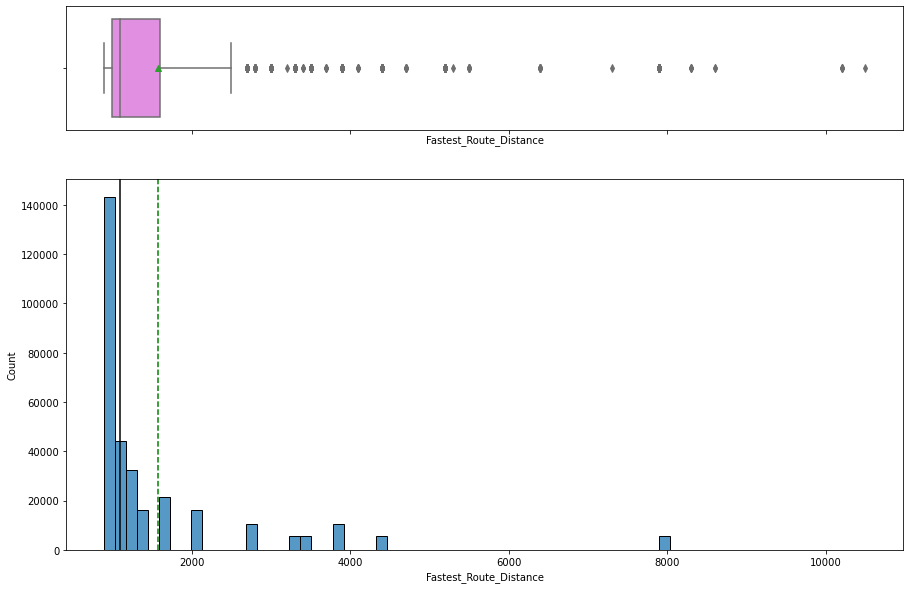

In [94]:
histogram_boxplot(logistics,"Fastest_Route_Distance",bins=70)

It can be seen that the data for the fastest route distance is right skewed with the mean being closer to 1000 <br> As we go further towards the right we notice that there are a few data points that go up to 10000

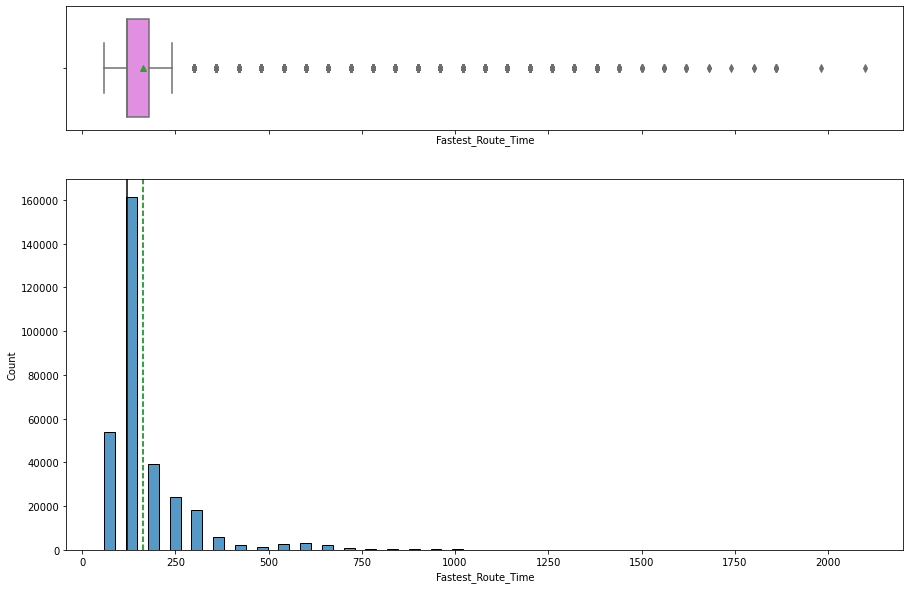

In [95]:
histogram_boxplot(logistics,"Fastest_Route_Time",bins=70)

We notice that the data for fastest route time is right skewed and the mean being close to 150 <br> The outliers begin from 250 and go up to 2000

In [96]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

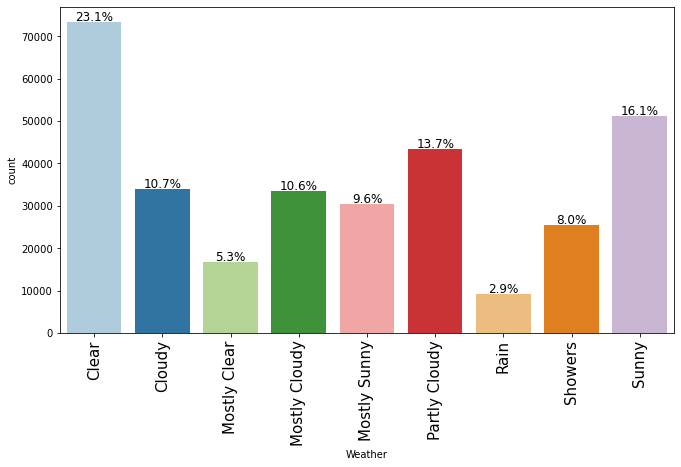

In [97]:
labeled_barplot(logistics,"Weather", perc = True)

The graph above shows how the data is split according to the weather conditions <br> We notice that 23.1% of the data points have a clear weather condition follwed by 16.1% being Sunny. <br> We can also notice that the weather conditions of the data set are more skewed towards cloudy or rainy conditions as around 50% of the data points fall under the categories Partly Cloudy, Rain, Showers, Mostly Cloudy and Cloudy.

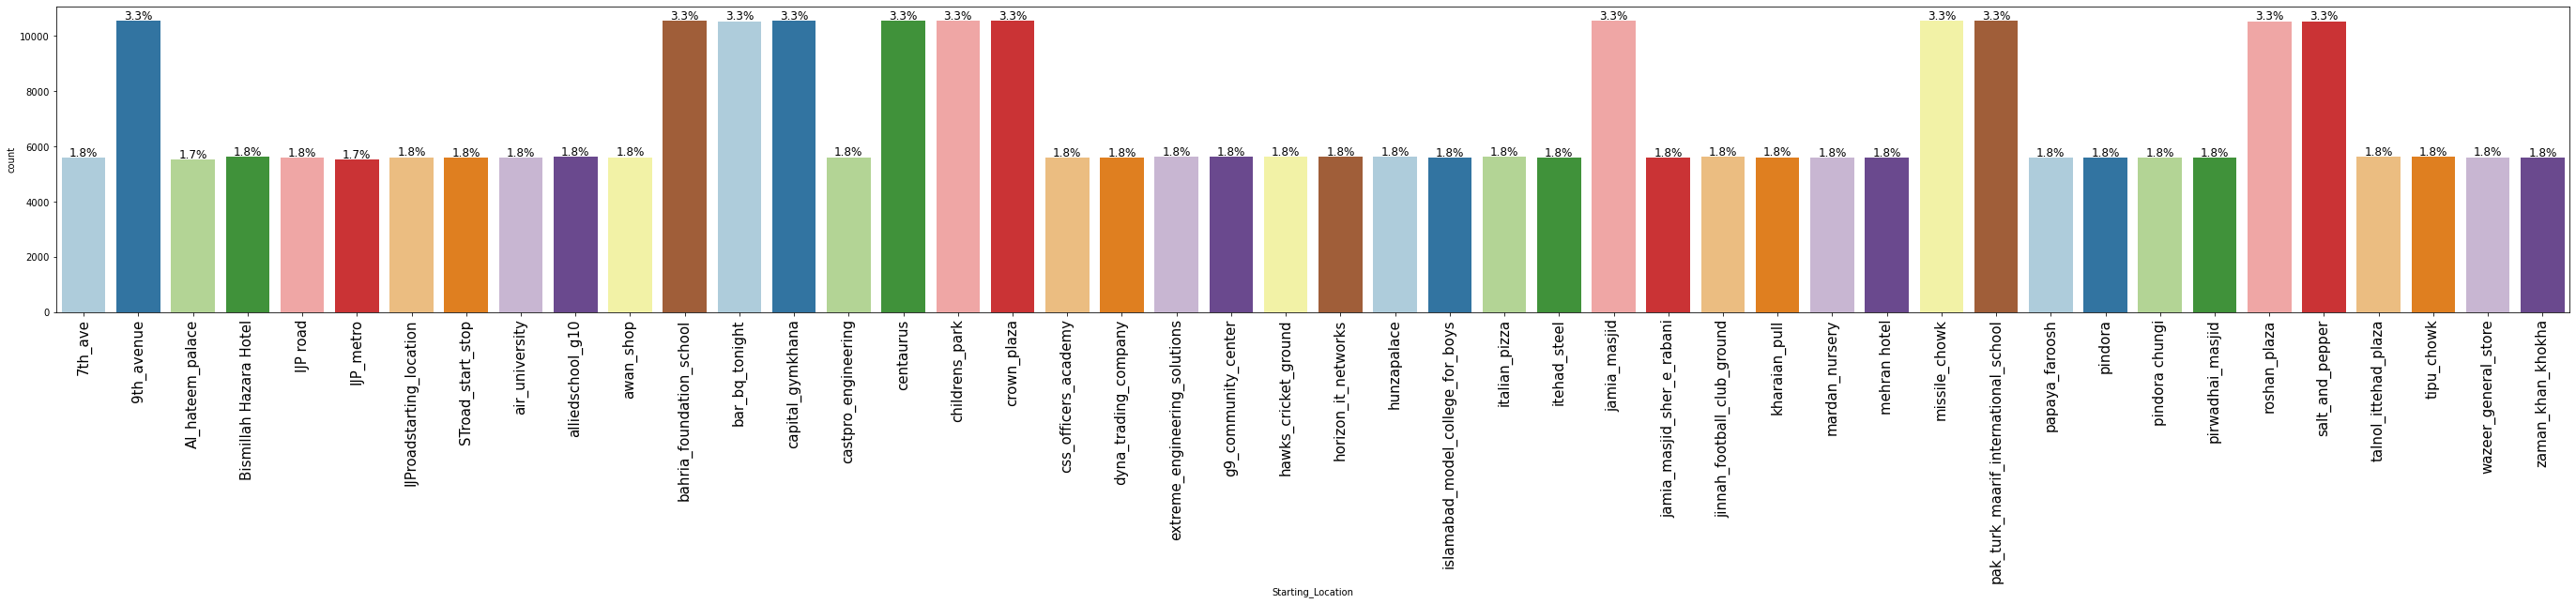

In [98]:
labeled_barplot(logistics,"Starting_Location", perc = True)

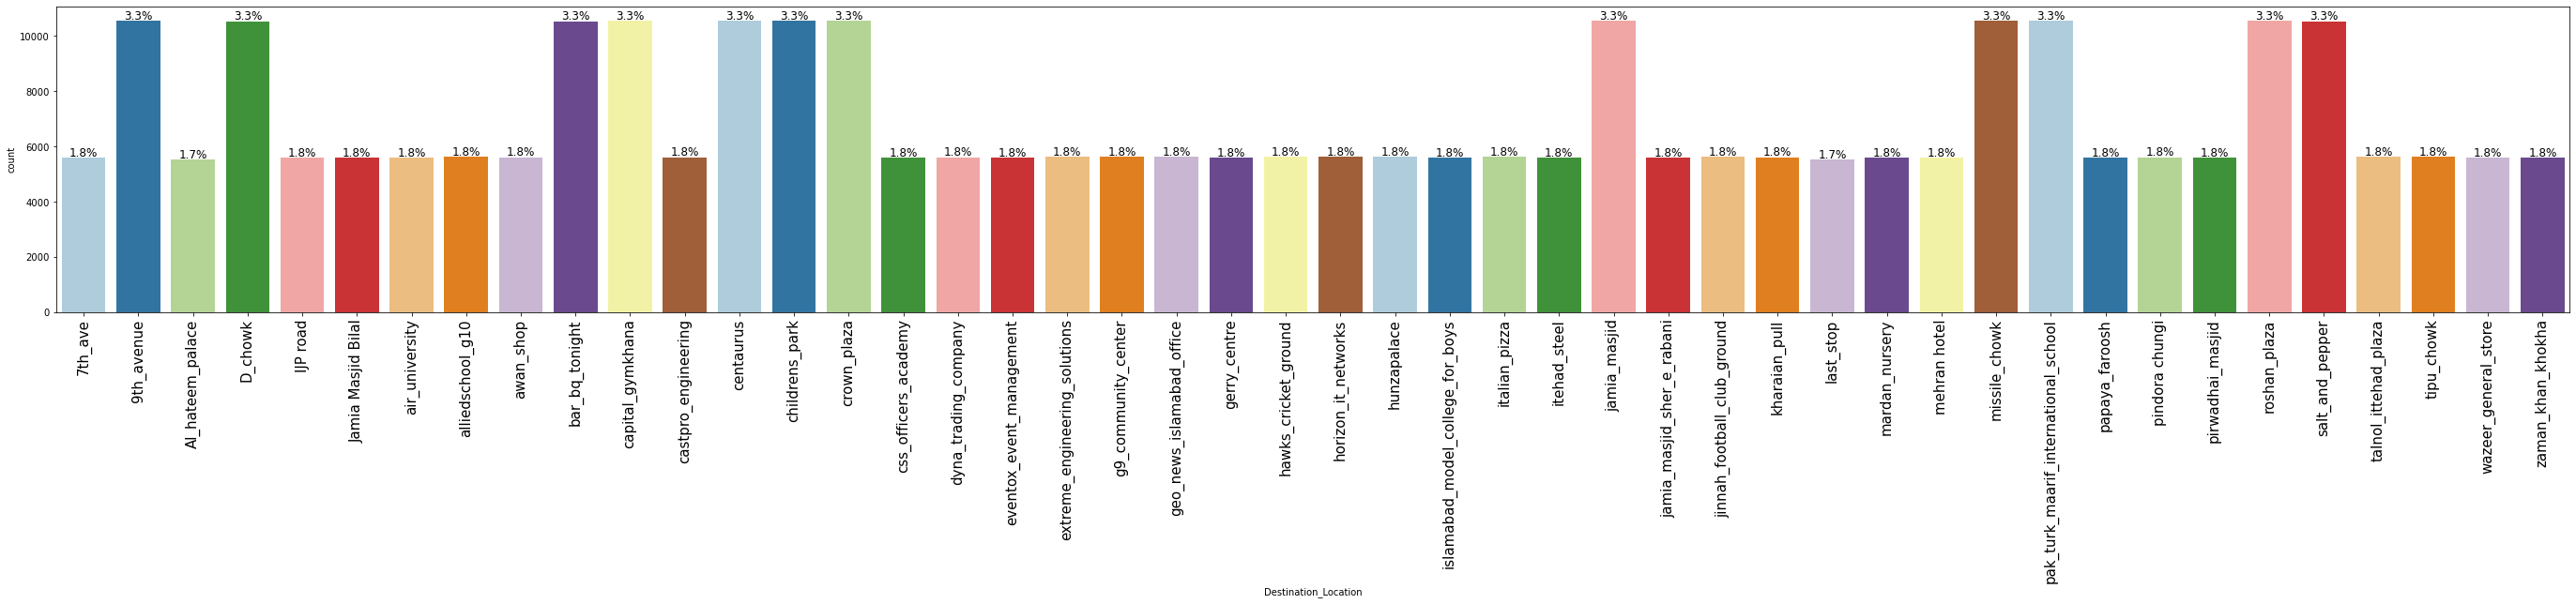

In [99]:
labeled_barplot(logistics,"Destination_Location", perc = True)

Looking at both the graphs for destination location and starting location, we notice the similarities in the data with almost both the graphs being the same apart from minute differences such as D_chowk being a part of the Destination location and not a part of the starting location. 

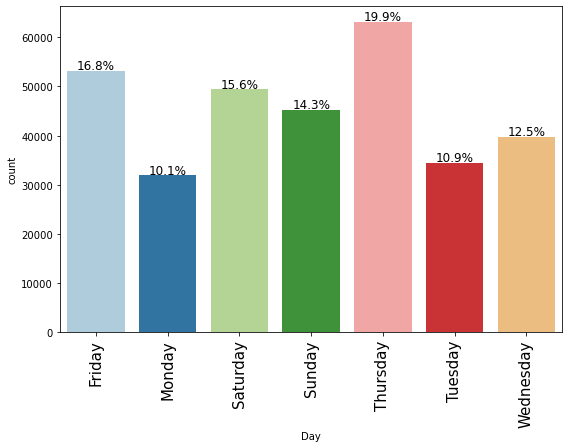

In [100]:
labeled_barplot(logistics,"Day", perc = True)

The graph above depicts that Thursday is the busiest day of the week with almost 19.9% of the data points followed by Friday, Saturday and Sunday. <br> We also notice that Monday is the least bussiest day with the fewest percentage (10.1%) of data points

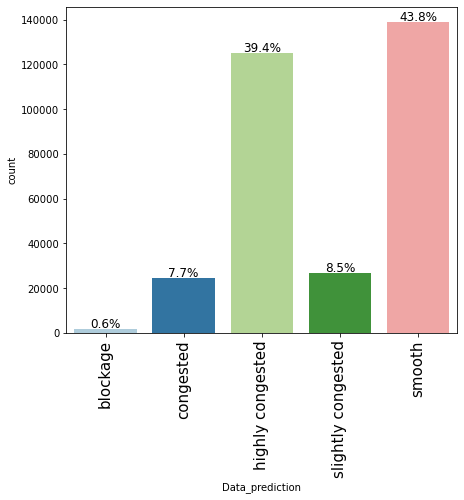

In [101]:
labeled_barplot(logistics,"Data_prediction", perc = True)

In the graph above we notice that 43.8% of the time, the travel is smooth. <br> We also see that the remaining 56.2% of the data points fall under Congested(highly, slightly and congested) and blockages.<br> We notice the imbalanced datasets and we need to further analyse what data points need to be balanced.

## Bivariative Analysis

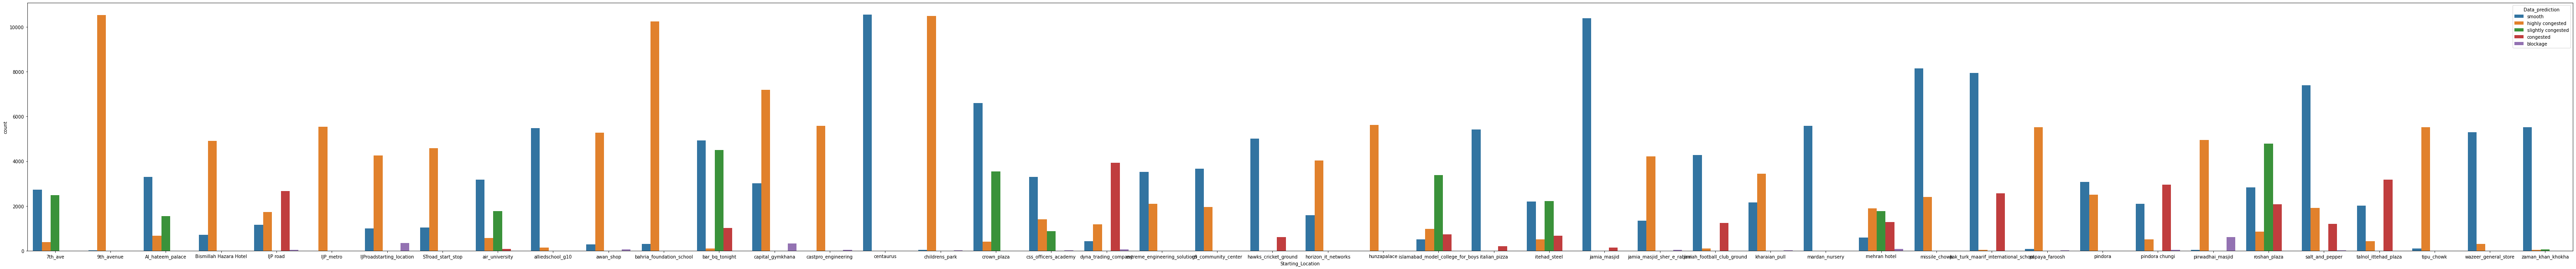

In [102]:
plt.figure(figsize=(100,10))
sns.countplot(x ='Starting_Location', hue = "Data_prediction", data = logistics)
 
# Show the plot
plt.show()

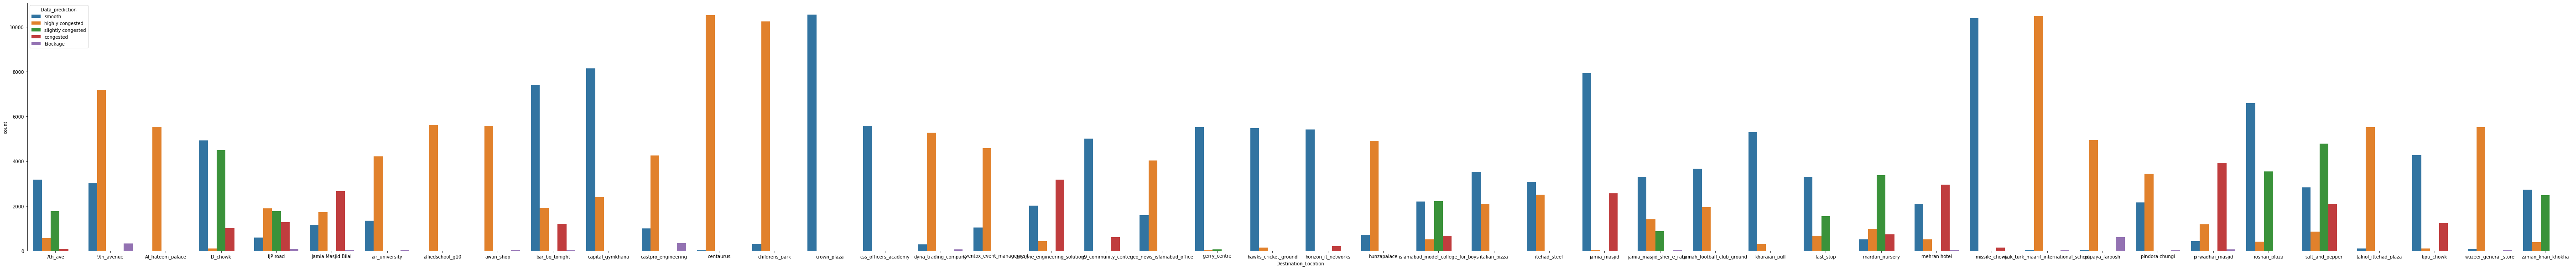

In [103]:
plt.figure(figsize=(100,10))
sns.countplot(x ='Destination_Location', hue = "Data_prediction", data = logistics)
 
# Show the plot
plt.show()

Both the graph above shows the traffic prediction for all destination locations. <br> In the graph above, each prediction is represented by the following colors: <br> Smooth: Blue <br> Highly Congested: Orange <br> Slightly Congested: Green <br> Slightly Congested: Green <br> Congested: Red <br> Blockage: Purple <br> Looking at the graph, we notice that the most prominent color is blue followed by orange. We also notice that particular destinantions are usually congested like children's park, centaurs, 9th ave, al hateem palace, air university and allied school. An alternative route could be suggested to the driver, or these particular routes could have the most traffic. In order to avoid the traffic, further time study analysis needs to be conducted in order to suggest the optimal time and date of travel based on the data prediction we have.

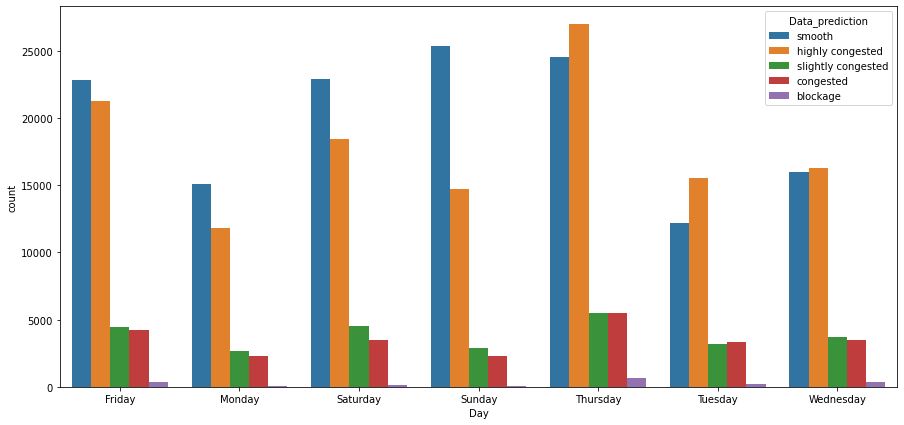

In [104]:
plt.figure(figsize=(15,7))
sns.countplot(x ='Day', hue = "Data_prediction", data = logistics)
 
# Show the plot
plt.show()

The graph above displays the Days of the X-axis with the different colors representing the Traffic Data Prediction. <br> Looking at the graph the following inshights were obtained: <br> Thursday is usally Highly congested, and also has the highest count of congested data prediction. <br> Sunday is the least congested. <br> Blockages are more prone to occur closer to the weekend starting from Wednesday going up to Friday.

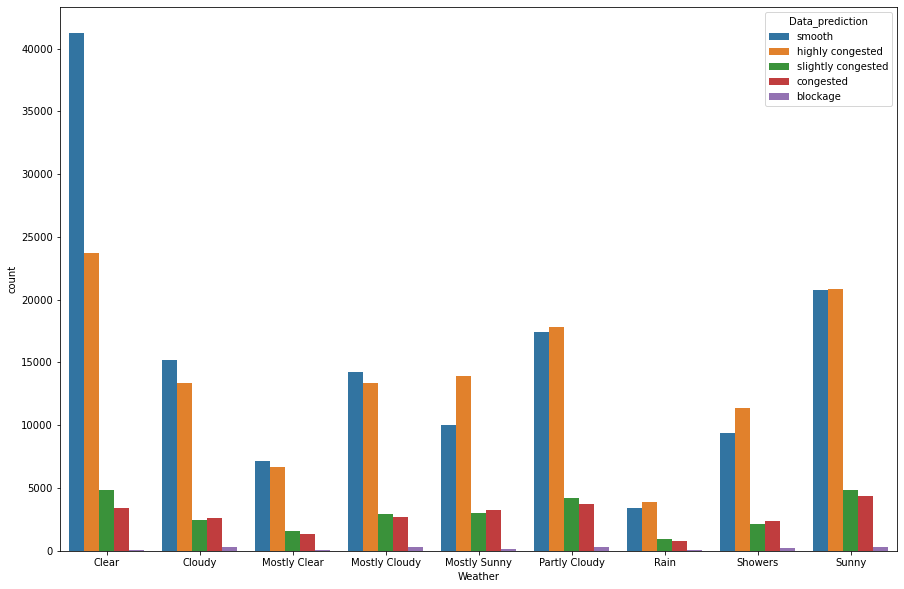

In [105]:
plt.figure(figsize=(15,10))
sns.countplot(x ='Weather', hue = "Data_prediction", data = logistics)
 
# Show the plot
plt.show()

The graph above states the obvious, clear conditions have the highest number of smooth data predictions. Although, there are a significant amount of highly congested data predictions as well. <br> When the conditions are either cloudy or showers occur, we notice that there are similar amount of data points for smooth and highly congested data predictions.

# Insights

After performing EDA, the follwing insights were gathered: <br> 1. All the columns with objects in the data type should be converted to categories for better memory allocation. <br> 2. The columns Special conditions and Holiday must be dropped as they only have one unique variable. <br> 3. The data is imbalanced in terms of the categorical variables available. <br> 4. There are outliers detected in both Fastest route time and Fastest route distance

### Further analysis by reducting the number of unique target variables 

In [106]:
congested = [ "highly congested", "slightly congested", "congested", "blockage"]
smooth = ["smooth"]

def reduce_marital_status(x):
    if x in congested:
        return "congested"
    elif x in smooth:
        return "smooth"
    else:
        return x

In [107]:
logistics.Data_prediction = logistics.Data_prediction.apply(reduce_marital_status)

In [108]:
logistics.Data_prediction.unique()

array(['smooth', 'congested'], dtype=object)

In [109]:
logistics.head()

,Date,Day,Destination_Location,Fastest_Route_Distance,Fastest_Route_Name,Fastest_Route_Time,Starting_Location,Sys_Time,Weather,Data_prediction
0,13/02/2020,Thursday,9th_avenue,1000,Jinnah Avenue,60,capital_gymkhana,0:00:01,Showers,smooth
1,13/02/2020,Thursday,centaurus,1300,Jinnah Avenue,120,9th_avenue,0:00:09,Showers,congested
2,13/02/2020,Thursday,crown_plaza,1000,Jinnah Avenue and Faisal Avenue Flyover,60,centaurus,0:00:17,Showers,smooth
3,13/02/2020,Thursday,roshan_plaza,2700,Jinnah Ave,180,crown_plaza,0:00:24,Showers,smooth
4,13/02/2020,Thursday,salt_and_pepper,3900,Jinnah Ave,300,roshan_plaza,0:00:31,Showers,congested


In [110]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Data_prediction                       congested  smooth     All
Destination_Location                                           
All                                      178285  138827  317112
crown_plaza                                   0   10543   10543
missile_chowk                               152   10391   10543
capital_gymkhana                           2395    8146   10541
jamia_masjid                               2606    7937   10543
bar_bq_tonight                             3148    7389   10537
roshan_plaza                               3934    6607   10541
css_officers_academy                         17    5579    5596
gerry_centre                                 87    5509    5596
hawks_cricket_ground                        138    5484    5622
horizon_it_networks                         196    5424    5620
kharaian_pull                               316    5297    5613
g9_community_center                         605    5017    5622
D_chowk                                 

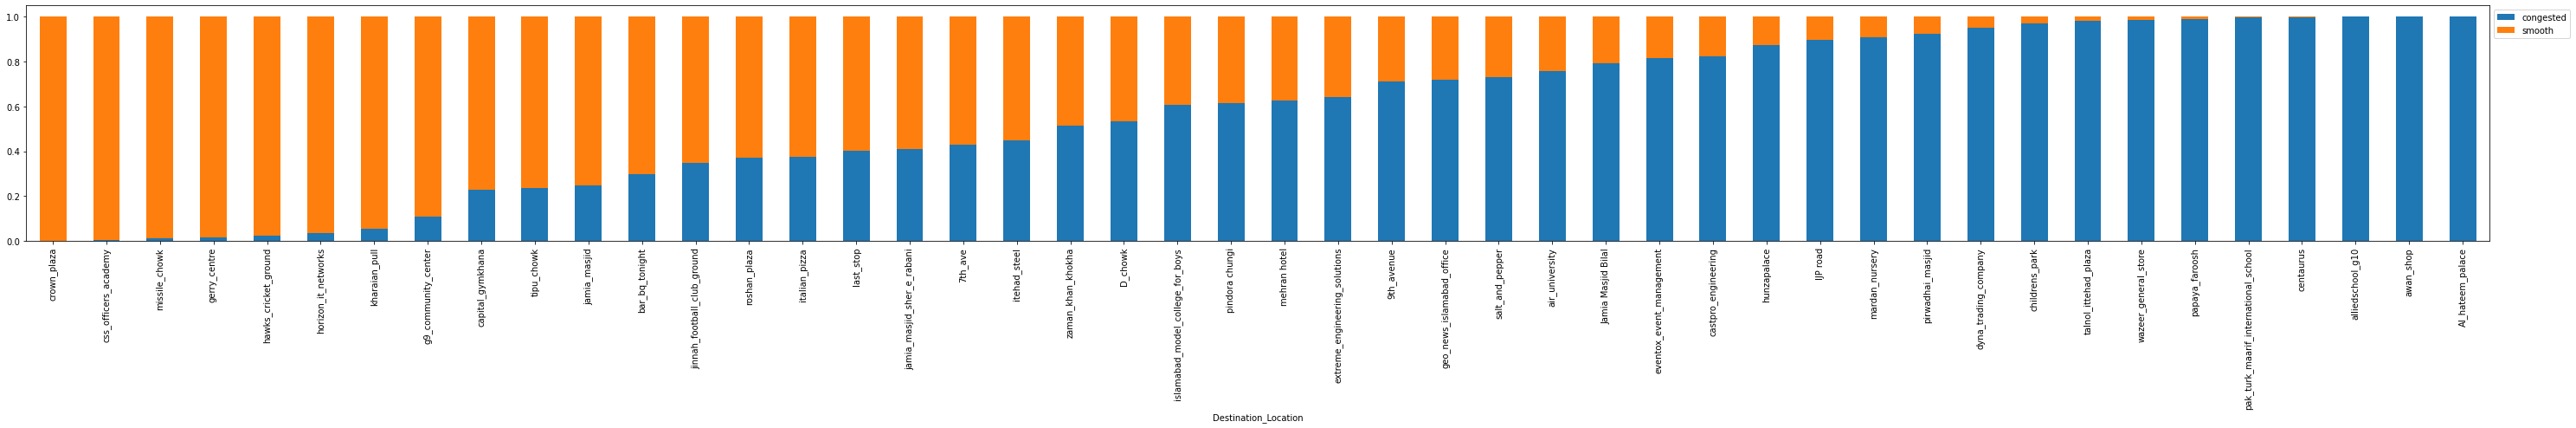

In [111]:
stacked_barplot(logistics, "Destination_Location", "Data_prediction")

Data_prediction  congested  smooth     All
Day                                       
All                 178285  138827  317112
Sunday               19917   25323   45240
Thursday             38601   24519   63120
Saturday             26527   22890   49417
Friday               30324   22850   53174
Wednesday            23770   15951   39721
Monday               16813   15103   31916
Tuesday              22333   12191   34524
------------------------------------------------------------------------------------------------------------------------


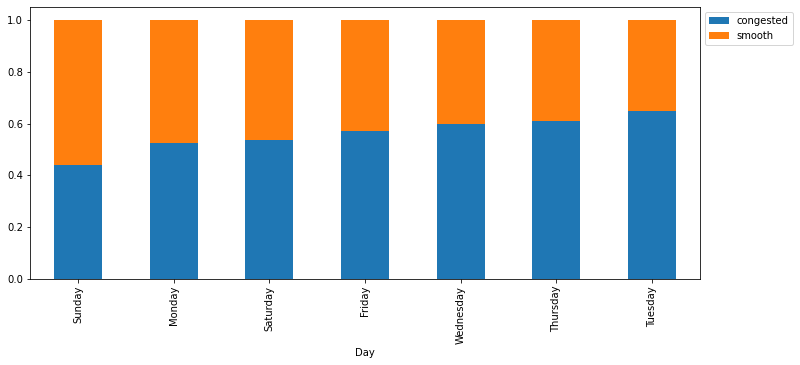

In [112]:
stacked_barplot(logistics, "Day", "Data_prediction")

Data_prediction  congested  smooth     All
Weather                                   
All                 178285  138827  317112
Clear                32055   41230   73285
Sunny                30364   20795   51159
Partly Cloudy        26002   17432   43434
Cloudy               18698   15158   33856
Mostly Cloudy        19347   14235   33582
Mostly Sunny         20379   10058   30437
Showers              16167    9352   25519
Mostly Clear          9596    7166   16762
Rain                  5677    3401    9078
------------------------------------------------------------------------------------------------------------------------


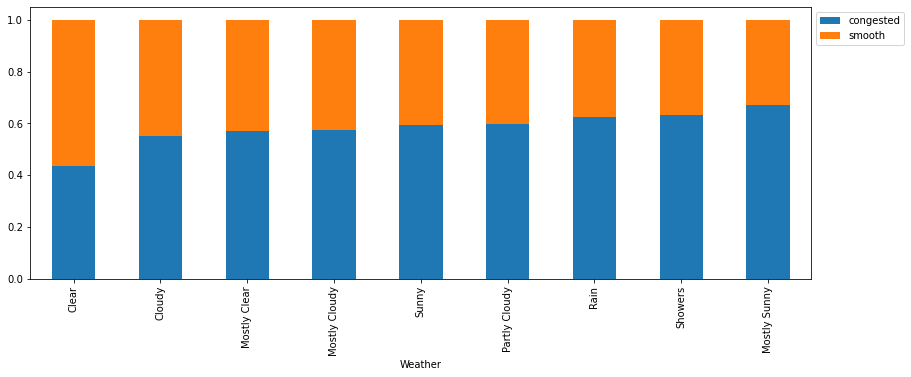

In [113]:
stacked_barplot(logistics, "Weather", "Data_prediction")

### Treating Outliers 

In [114]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [115]:
numerical_col = logistics.select_dtypes(include=np.number).columns.tolist()
logistics = treat_outliers_all(logistics, numerical_col)

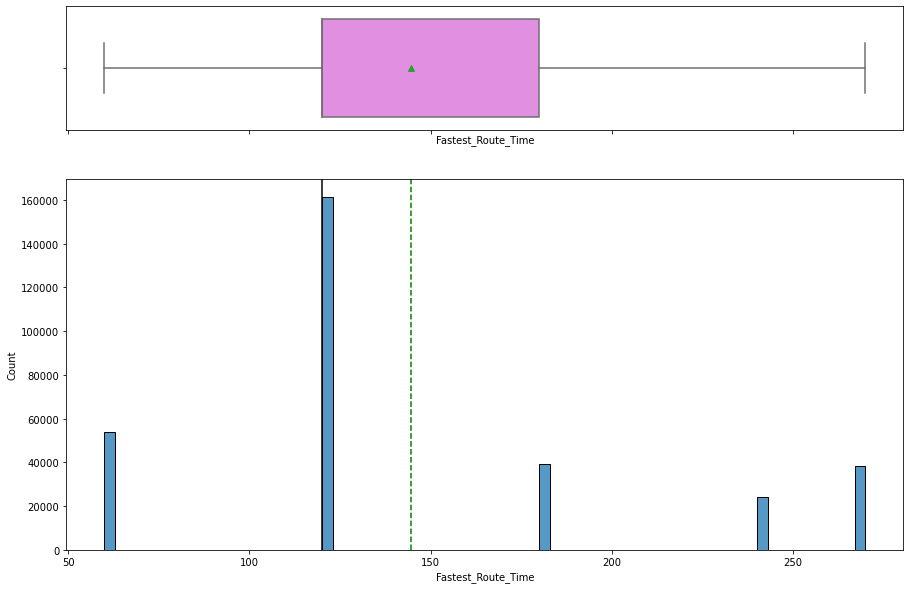

In [116]:
histogram_boxplot(logistics,"Fastest_Route_Time",bins=70)

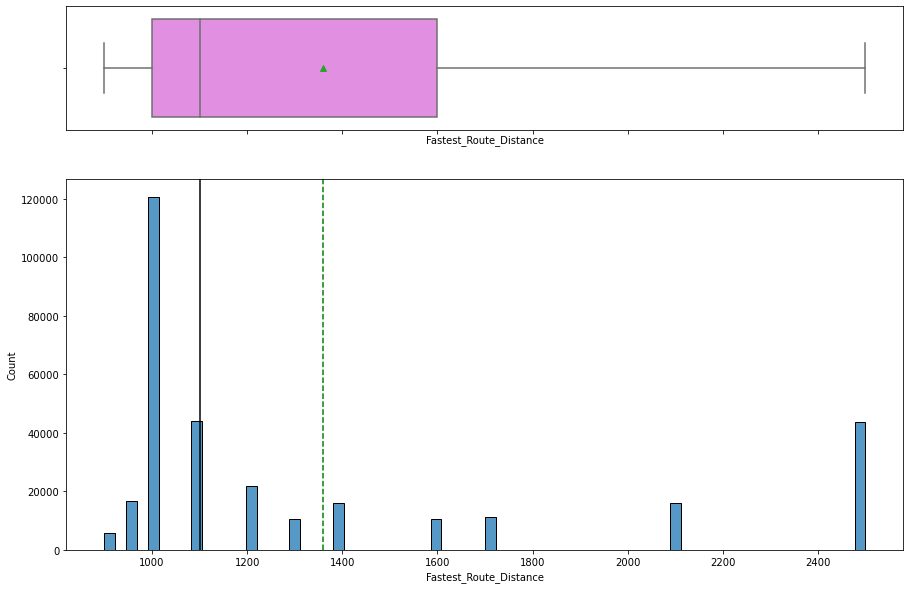

In [117]:
histogram_boxplot(logistics,"Fastest_Route_Distance",bins=70)